로지스틱 회귀-유방암
==
- 로지스틱회귀의 개념
- BreastCancer.csv

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [0]:
p, f = len(pass_time), len(fail_time)
p, f

(18, 16)

In [0]:
pass_sex = [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0]
fail_sex = [1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1]

In [0]:
len(pass_sex), len(fail_sex)

(18, 16)

In [0]:
pass_time_g = [1.5, 2, 2.1,2.6,2.1,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4, 1.3, 1.2]
fail_time_g = [16, 17, 16, 17,10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 18.1]

In [0]:
len(pass_time_g), len(fail_time_g)


(18, 16)

In [0]:
X1 = np.hstack((pass_time,fail_time))
X1

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 16. , 16. , 16.5,
       17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,  5.2,
        5.4])

In [0]:
X2 = np.hstack((pass_time_g,fail_time_g))
X2

array([ 1.5,  2. ,  2.1,  2.6,  2.1,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,
        3.6,  3. ,  5. ,  5.2,  5.4,  1.3,  1.2, 16. , 17. , 16. , 17. ,
       10. , 12. , 14. , 14.5, 15. , 16. , 16. , 16.5, 17. , 17. , 17. ,
       18.1])

In [109]:
X3 = np.hstack((pass_sex, fail_sex))
X3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [110]:
X = pd.DataFrame(list(zip(X1, X3)))
X

,0,1
0,8.0,0
1,9.0,0
2,9.0,0
3,9.5,0
4,10.0,0
5,12.0,0
6,14.0,0
7,14.5,0
8,16.0,0
9,16.0,0


In [111]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

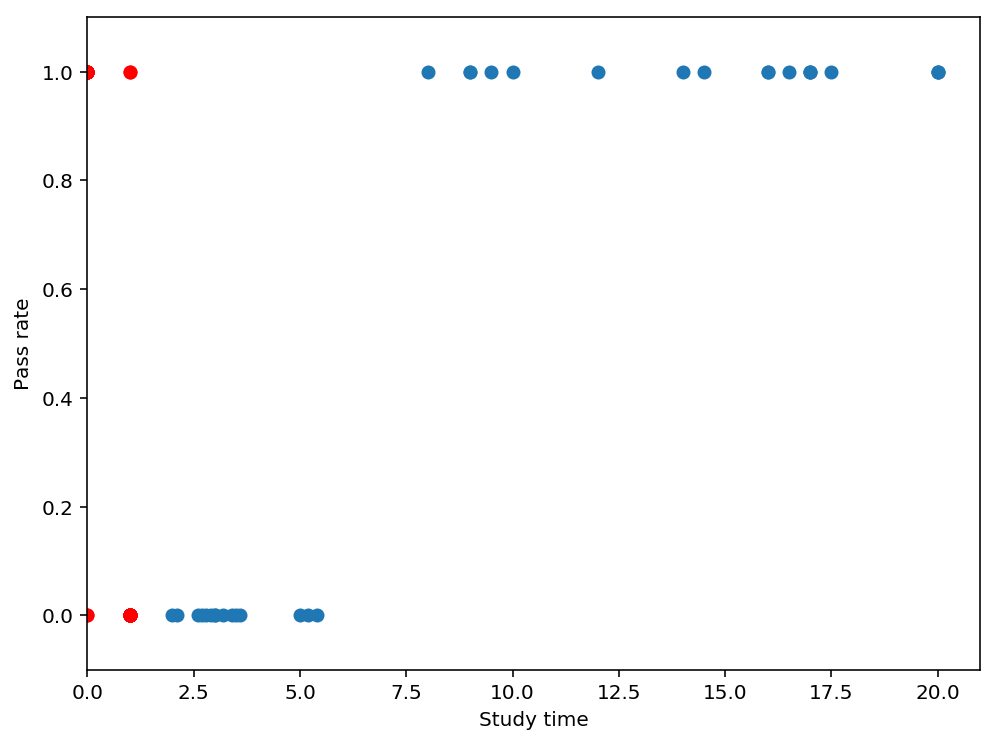

In [112]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X[0], y)
plt.scatter(X[1], y, c='r')

plt.show()

In [113]:
model = LogisticRegression()
model.fit(X,y)

print(model.coef_)
print(model.intercept_)

[[ 0.38470638 -1.64146859]]
[-1.6362334]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
model.predict([[1.2,5.5],[8.8,1.9]])

array([0, 1])

In [0]:
model.predict_proba([[1.2,5.5],[8.8,1.9]])

array([[0.89957074, 0.10042926],
       [0.01492088, 0.98507912]])

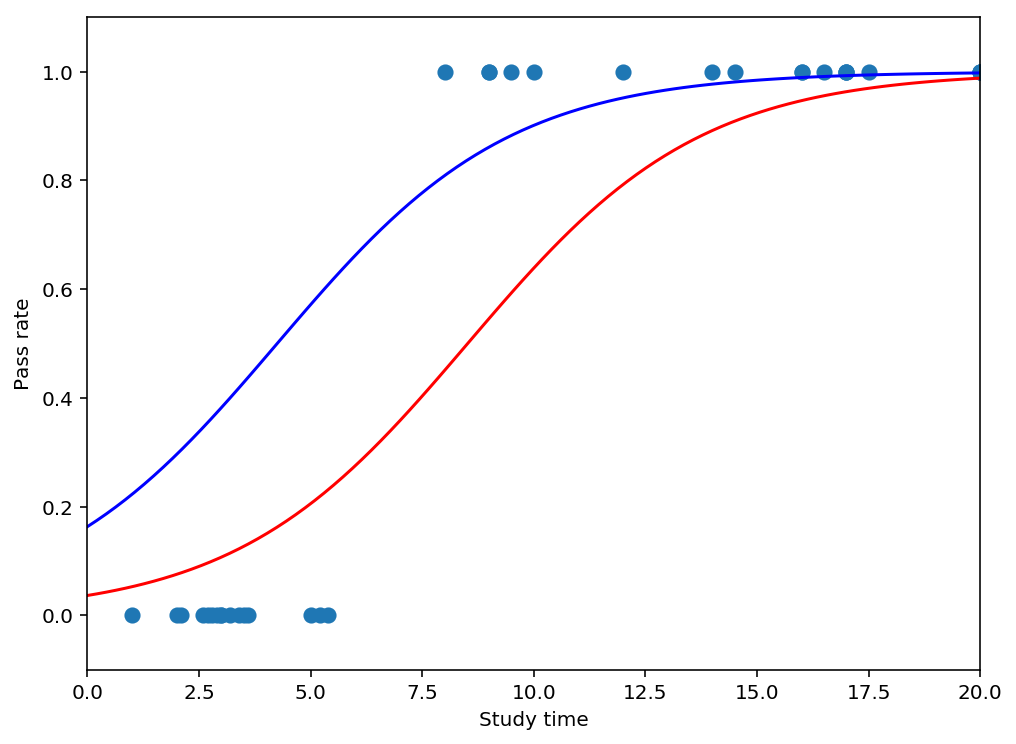

In [115]:
def logreg(z):
    return 1 /(1+np.exp(-z))

a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X[0], y, s=50)
XX = np.linspace(0,21, 100)
yy = logreg(a1*XX +a2*0+ b)
plt.plot(XX, yy, c='b')
yy = logreg(a1*XX +a2*1+ b)
plt.plot(XX, yy, c='r')
plt.show()

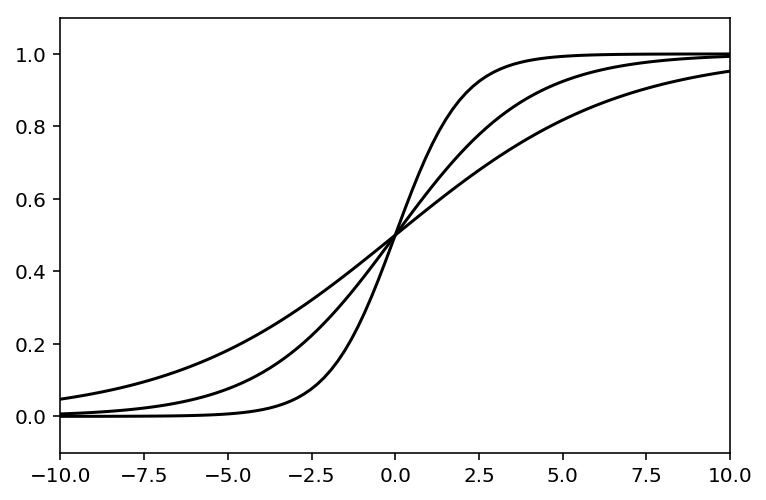

In [0]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

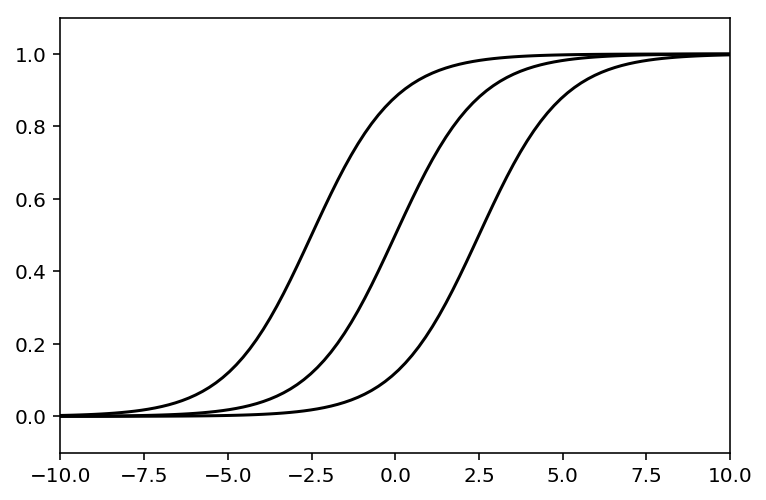

In [0]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   # K-fold cross validation
from sklearn import metrics

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
data = pd.read_csv('data/breast_cancer.csv')
print(data.shape)

(569, 33)


In [0]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34


In [0]:
model=LogisticRegression()
y = df["diagnosis"]

In [0]:
features = ["radius_mean"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 85.96%


In [0]:
X_test.shape

(171, 1)

In [0]:
print(model.coef_)
print(model.intercept_)

[[0.48325363]]
[-7.3485004]


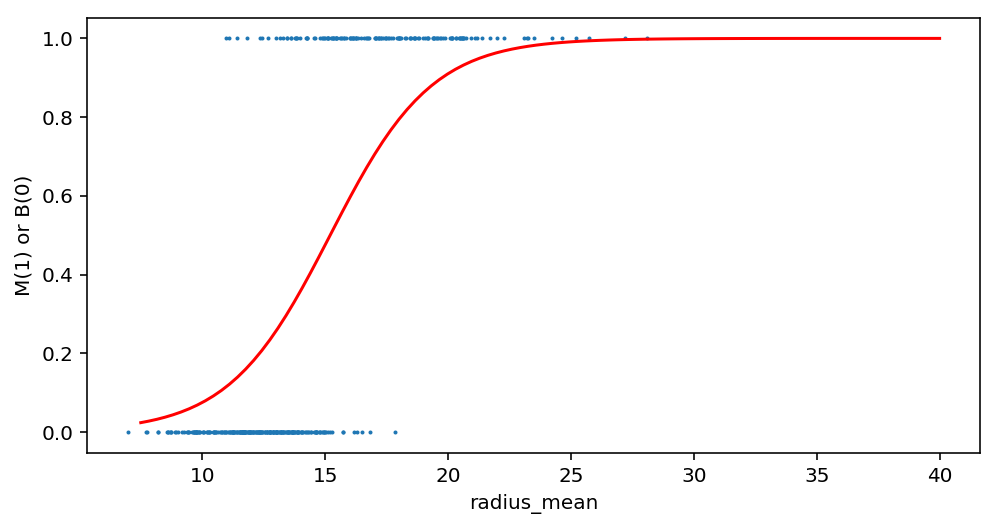

In [0]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [0]:
features = ["texture_mean"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 66.08%


In [0]:
print(model.coef_)
print(model.intercept_)

[[0.17814003]]
[-3.99279766]


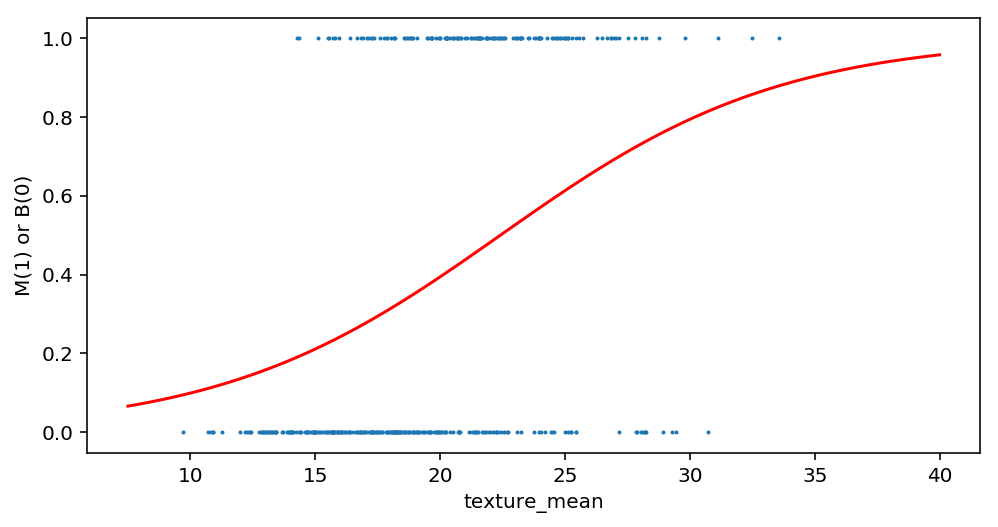

In [0]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [0]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 88.89%


Text(0,0.5,'texture_mean')

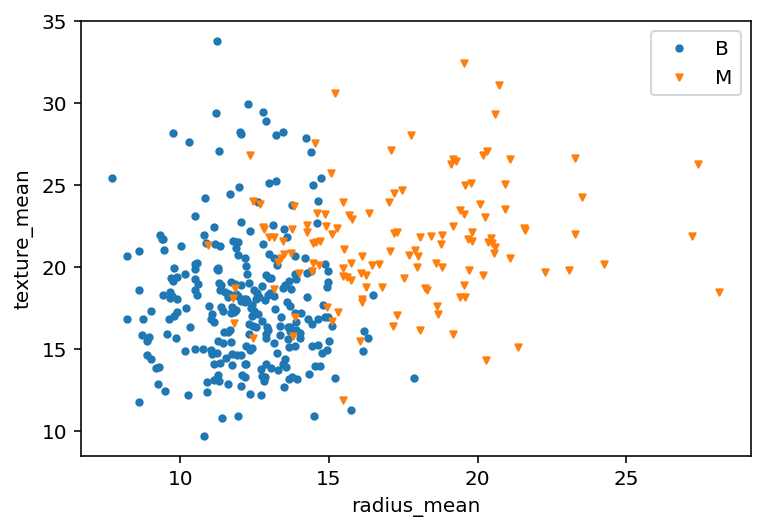

In [0]:
markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

In [0]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행

data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
X=data.drop('diagnosis', axis=1)

In [0]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0:.2%}".format(model_all.score(X_test, y_test)))

Score: 93.57%


In [0]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 90.06%
K =  3 -> Score: 91.81%
K =  5 -> Score: 93.57%
K =  7 -> Score: 92.98%
K =  9 -> Score: 92.98%
K =  11 -> Score: 92.40%
K =  13 -> Score: 92.40%
K =  15 -> Score: 91.81%
K =  17 -> Score: 91.81%
K =  19 -> Score: 91.81%


In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 92.98%


In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 96.49%


## 소프트맥스
- 다항 로지스틱스

In [0]:
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.045 0.074 0.333 0.548]
